In [ ]:
from magic_gap import *

import matplotlib.pyplot as plt
import pickle

In [97]:
def extract(d_big, d_small, data):
    for _ in data:
        if _["d_big"] == d_big and _["d_small"] == d_small:
            return _

In [98]:
d_big_range = np.arange(3, 6)
qudit_data = []
for d_big in d_big_range:
    for d_small in range(2, d_big):
        D_big = qudit_wh_operators(d_big)
        D_small = qudit_wh_operators(d_small)
        B = np.eye(d_big)[:d_small]
        magic_gap_data = magic_gap(D_big, D_small, B, M=5000, R=10)
        print("d_big: %d, d_small: %d => gap: %.5f +/- %.5f" % (d_big, d_small, magic_gap_data["avg_magic_gap"], magic_gap_data["avg_magic_gap_std"]))
        qudit_data.append(magic_gap_data)
        with open("simple_qudit_magic_gap.pkl", "wb") as f:  
            pickle.dump(qudit_data, f)

d_big: 3, d_small: 2 => gap: 0.20000 +/- 0.00000
d_big: 4, d_small: 2 => gap: 0.20000 +/- 0.00000
d_big: 4, d_small: 3 => gap: 0.06667 +/- 0.00000
d_big: 5, d_small: 2 => gap: 0.20000 +/- 0.00000
d_big: 5, d_small: 3 => gap: 0.13333 +/- 0.00000
d_big: 5, d_small: 4 => gap: 0.08571 +/- 0.00000


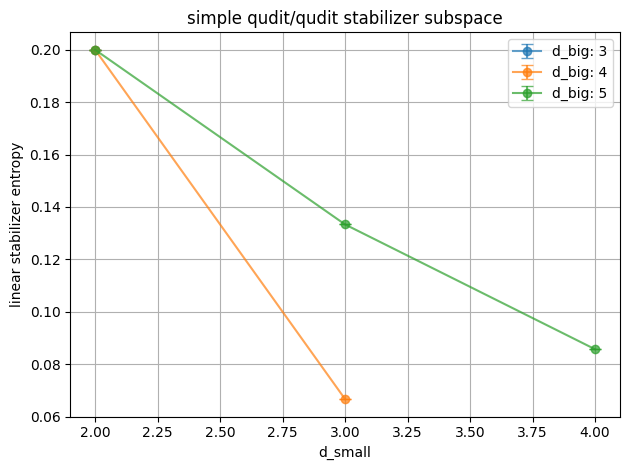

In [ ]:
for d_big in d_big_range:
    d_small_range = np.arange(2, d_big)
    avg_magic_gap = []
    avg_magic_gap_std = []
    for d_small in d_small_range:
        data = extract(d_big, d_small, qudit_data)
        avg_magic_gap.append(data["avg_magic_gap"])
        avg_magic_gap_std.append(data["avg_magic_gap_std"])
    plt.errorbar(d_small_range, avg_magic_gap, yerr=avg_magic_gap_std, fmt='-o', capsize=4, alpha=0.7, label='d_big: %d' % d_big)

plt.legend()
plt.title("simple qudit/qudit stabilizer subspace")
plt.xlabel("d_small")
plt.ylabel("linear stabilizer entropy")
plt.grid(True)
plt.tight_layout()
plt.show()

In [105]:
n_qubits_range = np.arange(2, 4)
n_qubit_data = []
for n_qubits in n_qubits_range:
    d_big = 2**n_qubits
    for d_small in range(2, d_big):
        D_big = wh_operators(*[2]*n_qubits)
        D_small = qudit_wh_operators(d_small)
        B = np.eye(d_big)[:d_small]
        magic_gap_data = magic_gap(D_big, D_small, B, M=5000, R=10)
        print("d_big: %d, d_small: %d => gap: %.5f +/- %.5f" % (d_big, d_small, magic_gap_data["avg_magic_gap"], magic_gap_data["avg_magic_gap_std"]))
        n_qubit_data.append(magic_gap_data)
        with open("simple_nqubit_magic_gap.pkl", "wb") as f:  
            pickle.dump(n_qubit_data, f)

d_big: 4, d_small: 2 => gap: 0.00000 +/- 0.00000
d_big: 4, d_small: 3 => gap: 0.00000 +/- 0.00000
d_big: 8, d_small: 2 => gap: -0.00001 +/- 0.00121
d_big: 8, d_small: 3 => gap: 0.00040 +/- 0.00126
d_big: 8, d_small: 4 => gap: -0.05722 +/- 0.00068
d_big: 8, d_small: 5 => gap: 0.01417 +/- 0.00069
d_big: 8, d_small: 6 => gap: 0.00000 +/- 0.00102
d_big: 8, d_small: 7 => gap: -0.03320 +/- 0.00095


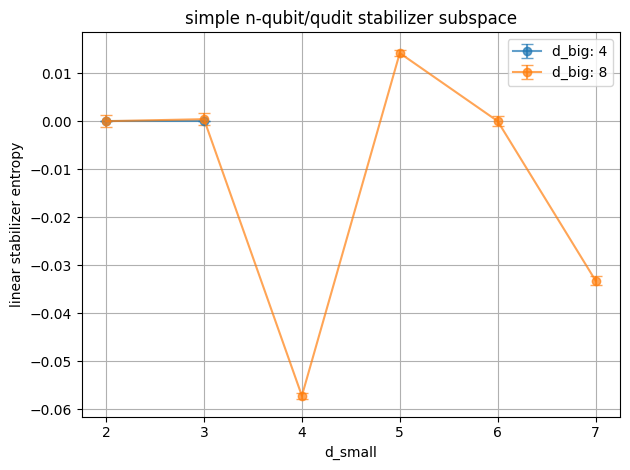

In [106]:
for n_qubits in n_qubits_range:
    d_big = 2**n_qubits
    d_small_range = np.arange(2, d_big)
    avg_magic_gap = []
    avg_magic_gap_std = []
    for d_small in d_small_range:
        data = extract(d_big, d_small, n_qubit_data)
        avg_magic_gap.append(data["avg_magic_gap"])
        avg_magic_gap_std.append(data["avg_magic_gap_std"])
    plt.errorbar(d_small_range, avg_magic_gap, yerr=avg_magic_gap_std, fmt='-o', capsize=4, alpha=0.7, label='d_big: %d' % d_big)

plt.legend()
plt.title("simple n-qubit/qudit stabilizer subspace")
plt.xlabel("d_small")
plt.ylabel("linear stabilizer entropy")
plt.grid(True)
plt.tight_layout()
plt.show()

d_big 3 | d_small 2 => wgap: 0.80000

d_big 3 | d_small 2 => gap: 0.20000

d_big 5 | d_small 2 => gap: 0.20000

d_big 5 | d_small 3 => gap: 0.13333

d_big 5 | d_small 4 => gap: 0.08571

d_big 7 | d_small 2 => gap: 0.20000

d_big 7 | d_small 3 => gap: 0.13333

d_big 7 | d_small 4 => gap: 0.14286

d_big 7 | d_small 5 => gap: 0.08571